<a href="https://colab.research.google.com/github/jalammar/embeddings/blob/master/Loading_and_visualizing_embeddings_in_Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#python 3.6

In [15]:
import gensim
import gensim.downloader as api
from gensim.models import Word2Vec
from matplotlib import pyplot as plt

In [16]:
import seaborn as sns

In [2]:
model = api.load("glove") # 
#model = Word2Vec.load('word2vec_model2_glov_840B')

In [7]:
import math
def cosine_similarity(v1,v2):
    "compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

In [9]:
A = (model["drink"], model["dunkin"], cosine_similarity(model["dunkin"],model["dunkin"]))

In [10]:
print (A)

(array([-5.1113e-01,  8.6922e-01, -2.3396e-01,  8.1210e-01, -4.2391e-01,
        1.0289e+00,  9.7995e-01, -1.3474e+00, -8.3882e-02,  2.6585e-01,
        4.2442e-01, -4.7899e-01, -4.2023e+00, -7.3773e-01, -1.4990e-01,
        3.8463e-02,  1.2547e+00, -8.3254e-01,  3.3043e-01, -2.9497e-02,
       -4.9897e-01,  2.7387e-03,  3.7012e-01,  1.1378e+00,  1.3900e+00],
      dtype=float32), array([-1.3251  ,  1.2717  ,  0.82228 ,  0.37374 , -0.93207 ,  0.11504 ,
        0.24735 , -1.187   ,  0.39613 ,  0.26148 ,  0.69195 , -0.22527 ,
       -2.044   , -1.2764  ,  0.70533 , -0.22383 ,  1.2618  , -1.1535  ,
        0.52204 ,  0.69362 , -0.64551 , -0.13004 ,  0.099508,  0.20899 ,
        0.68365 ], dtype=float32), 1.0)


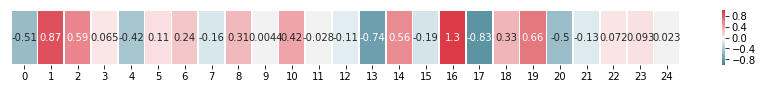

In [30]:
plt.figure(figsize=(15,1))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap([model["drink"]%model["dunkin"]],  yticklabels=False, cbar=True,
            linewidths=0.7, vmin=-1, vmax=1, annot=True, cmap=cmap)
plt.show()

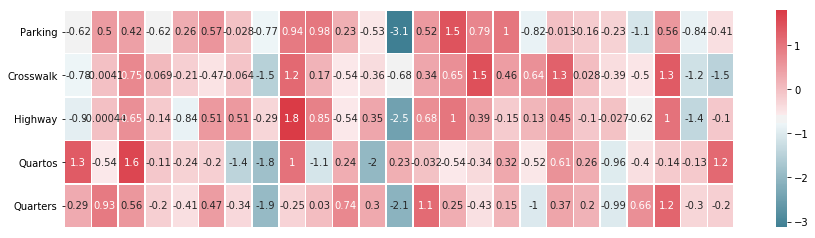

<Figure size 432x288 with 0 Axes>

In [20]:
#As shown in the heatmap at some point these words are related
plt.figure(figsize=(15,4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap([model["parking"], 
              model["crosswalk"], 
              model["highway"],
              model["quartos"],
              model["quarters"],
              
            ], cbar=True, xticklabels=False, linewidths=0.6, annot=True, cmap=cmap, yticklabels=['Parking', 'Crosswalk', 'Highway','Quartos', 'Quarters']) 
plt.show()
plt.savefig('demo1.svg')
#plt.savefig('destination_path.eps', format='eps', dpi=1000)
#save_images_to_svg('this_notebook.ipynb')